In [58]:
!pip install missingno



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [60]:
data = pd.read_csv("AQI Data Set.csv")

In [61]:
data.head()

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [62]:
data = data.drop("Id", axis = 1)

In [63]:
data.columns = ['months', 'pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co', 'benzene', 'AQI']


In [64]:
data.head()

,months,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [65]:
data[['month', 'year']] = data['months'].str.split("-", expand = True)

In [66]:
data.head()

,months,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI,month,year
0,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0,Jan,17
1,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0,Feb,17
2,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0,Mar,17
3,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0,Apr,17
4,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN,May,17


In [67]:
month = {'Jan': "1", 'Feb':'2', "Mar": '3', "Apr": '4', "May": '5', "Jun":"6", "Jul": "7", "Aug": "8", "Sep": "9", "Oct":"10", "Nov":"11", "Dec":"12"}
data['month'] = data['month'].map(month)

data['year'] = 2000 + data['year'].astype('int')
data['month'] = data['month'].astype('int')

new_data = data[['month', 'year', 'pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co', 'benzene', 'AQI']].copy()

In [68]:
new_data.head()

,month,year,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,1,2017,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,2017,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,2017,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,2017,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,2017,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


<Axes: >

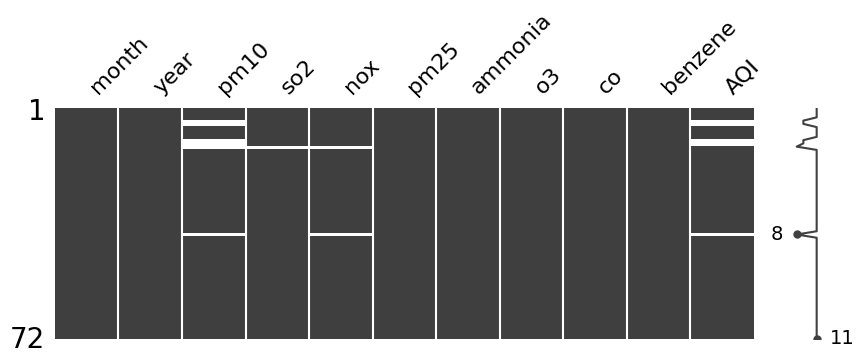

In [69]:
msno.matrix(new_data, figsize = (10,  3))

<Axes: >

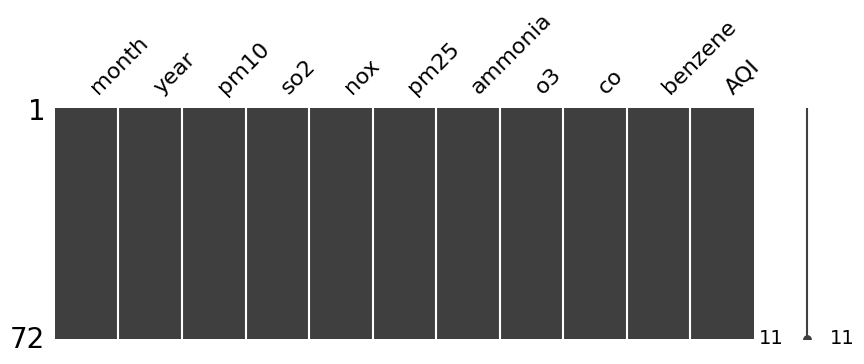

In [70]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan, n_neighbors = 2)
clean_data = pd.DataFrame(imputer.fit_transform(new_data), columns = ['month', 'year', 'pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co', 'benzene', 'AQI'])

msno.matrix(clean_data, figsize = (10,  3))

In [71]:
clean_data.head()

,month,year,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,1.0,2017.0,174.0,26.4,35.0,79.0,25.0,107.6,0.9,0.7,149.0
1,2.0,2017.0,143.0,35.1,40.3,75.0,31.0,103.0,0.9,0.9,129.0
2,3.0,2017.0,142.0,32.1,30.9,59.0,26.0,80.7,0.8,0.5,128.0
3,4.0,2017.0,117.0,50.9,36.3,75.0,36.0,79.5,0.9,0.7,111.0
4,5.0,2017.0,144.0,41.6,25.2,53.0,28.0,70.0,0.5,0.5,129.0


In [72]:
clean_data['month'] = clean_data['month'].astype("int")
clean_data['year'] = clean_data['year'].astype("int")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    72 non-null     int64  
 1   year     72 non-null     int64  
 2   pm10     72 non-null     float64
 3   so2      72 non-null     float64
 4   nox      72 non-null     float64
 5   pm25     72 non-null     float64
 6   ammonia  72 non-null     float64
 7   o3       72 non-null     float64
 8   co       72 non-null     float64
 9   benzene  72 non-null     float64
 10  AQI      72 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 6.3 KB


In [73]:
numeric_features = ['pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co', 'benzene', 'AQI']
categorical_features = ['month', 'year']
clean_data[numeric_features].describe()

,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000
mean,110.916667,16.799306,30.235417,46.722222,23.997222,27.790278,0.549722,0.22500,106.213889
std,25.184111,9.796092,4.110279,20.224251,5.824450,22.585906,0.238764,0.19307,22.319410
min,76.000000,4.000000,18.400000,12.000000,11.000000,2.400000,0.200000,0.00000,58.000000
25%,90.750000,9.950000,28.075000,27.000000,20.000000,12.475000,0.400000,0.10000,92.000000
50%,104.500000,14.100000,29.750000,47.000000,23.000000,20.750000,0.500000,0.20000,103.750000
75%,129.250000,20.225000,32.675000,63.000000,28.000000,35.550000,0.647500,0.30000,120.175000
max,178.000000,50.900000,40.300000,87.000000,37.000000,107.600000,1.520000,0.90000,166.000000


In [74]:
def show_distribution_alt(var):
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    
    # Histogram + KDE + rug
    sns.histplot(data=clean_data, x=var, color='skyblue', kde=True, bins=20, ax=ax[0])
    sns.rugplot(data=clean_data, x=var, height=0.05, ax=ax[0], color='black')

    ax[0].axvline(clean_data[var].mean(), color='green', linestyle='--', label='Mean')
    ax[0].axvline(clean_data[var].median(), color='purple', linestyle='--', label='Median')
    ax[0].set_title(f"Histogram & KDE for {var}")
    ax[0].legend()

    # Violin plot
    sns.violinplot(data=clean_data, x=var, ax=ax[1], color='lightcoral')
    ax[1].set_title(f"Violin Plot for {var}")
    
    plt.tight_layout()
    plt.show()


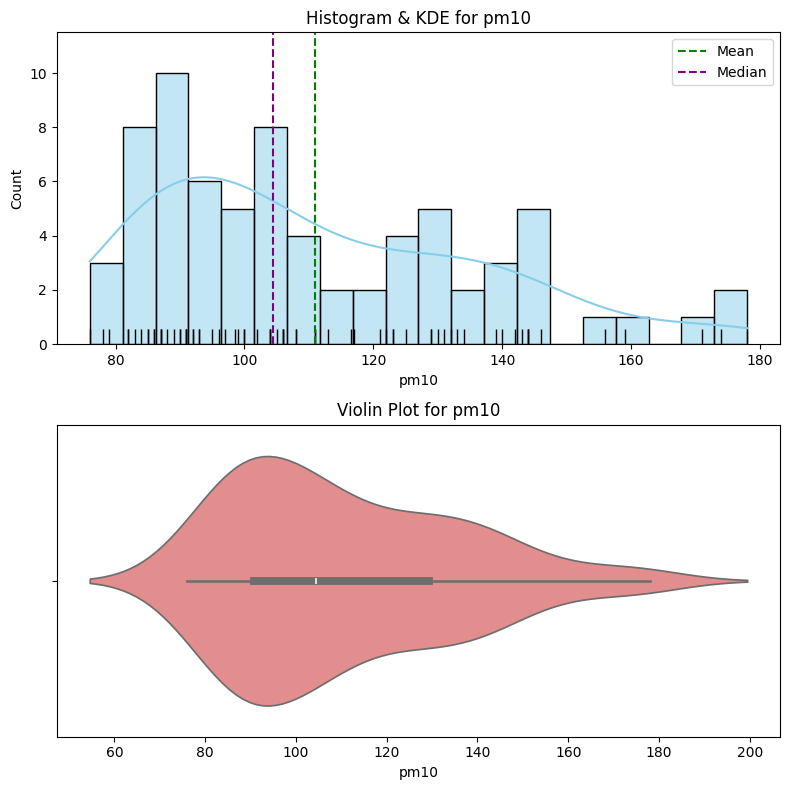

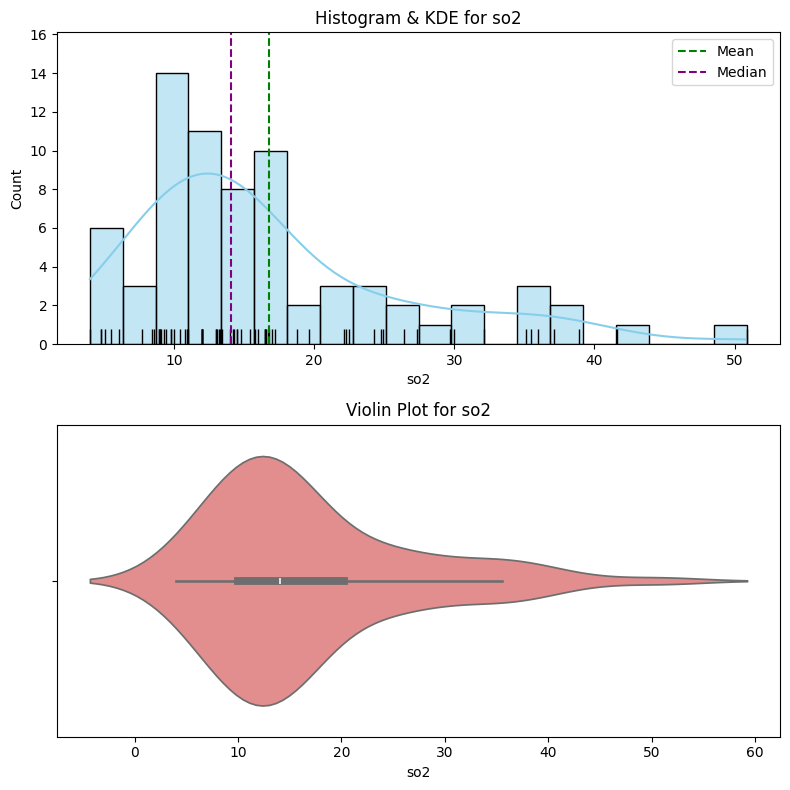

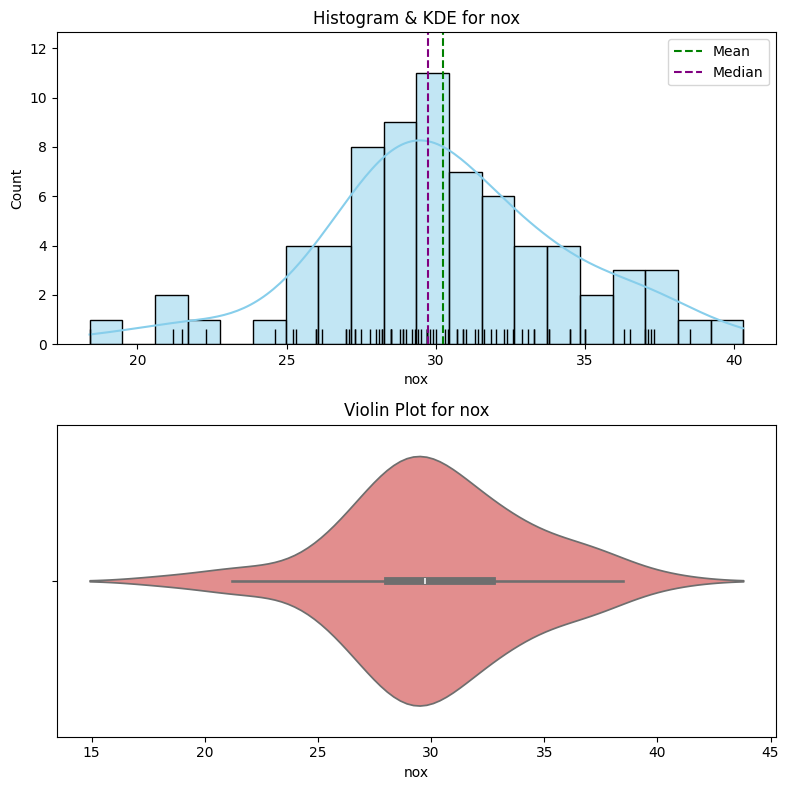

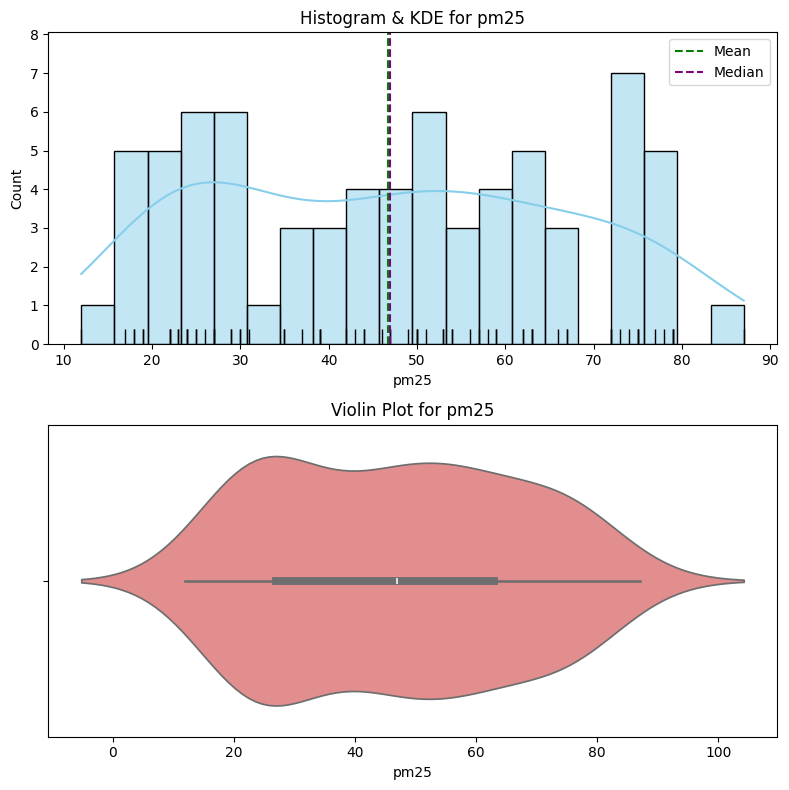

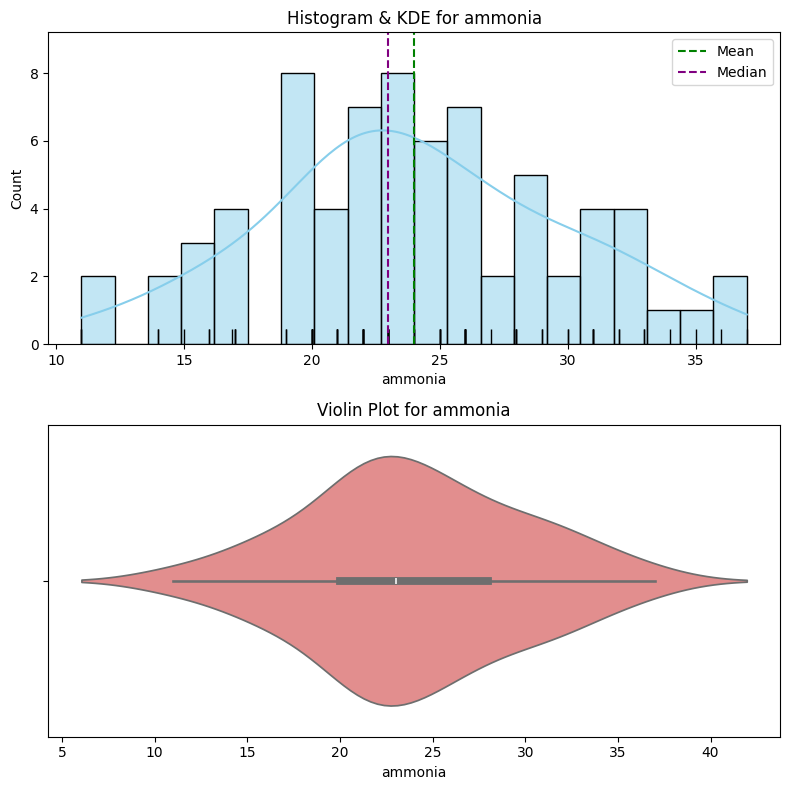

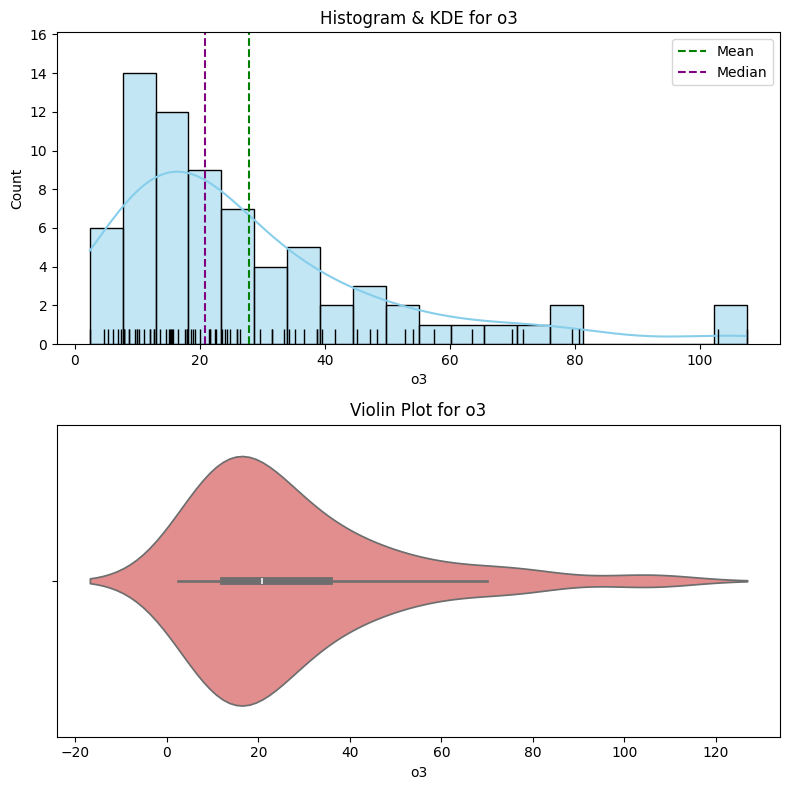

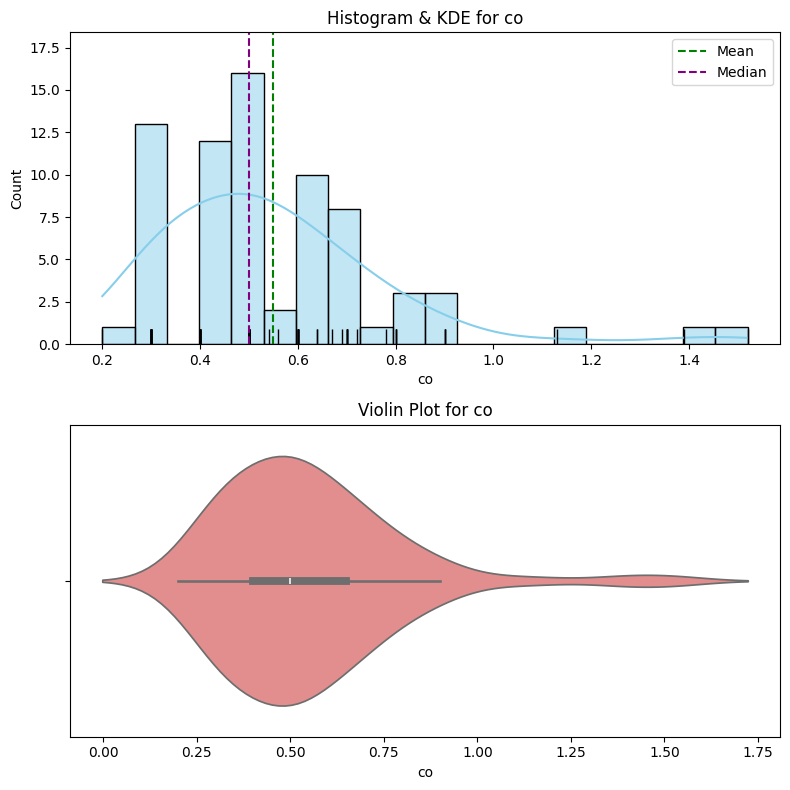

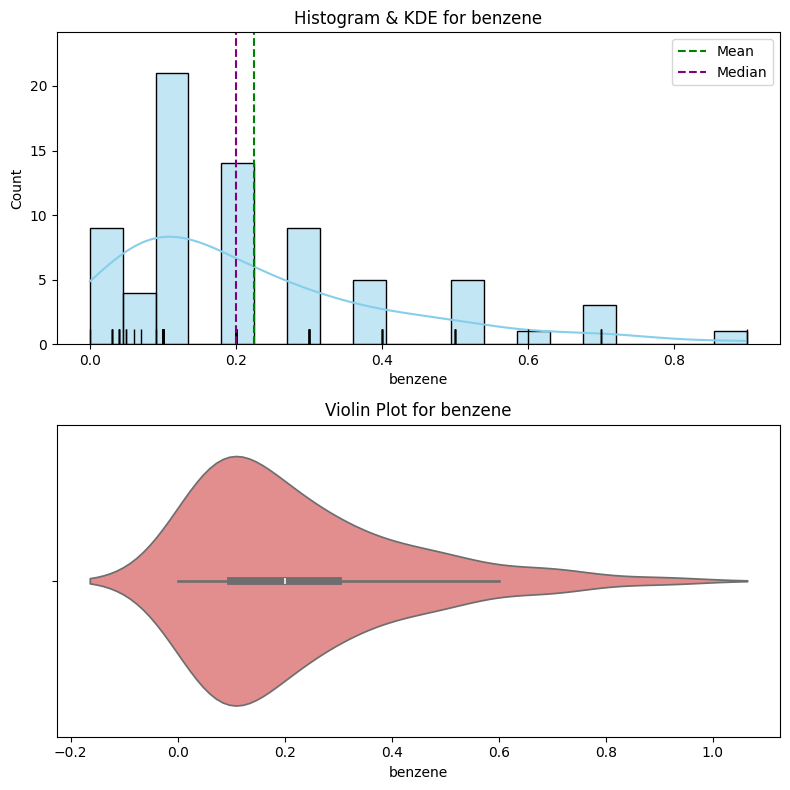

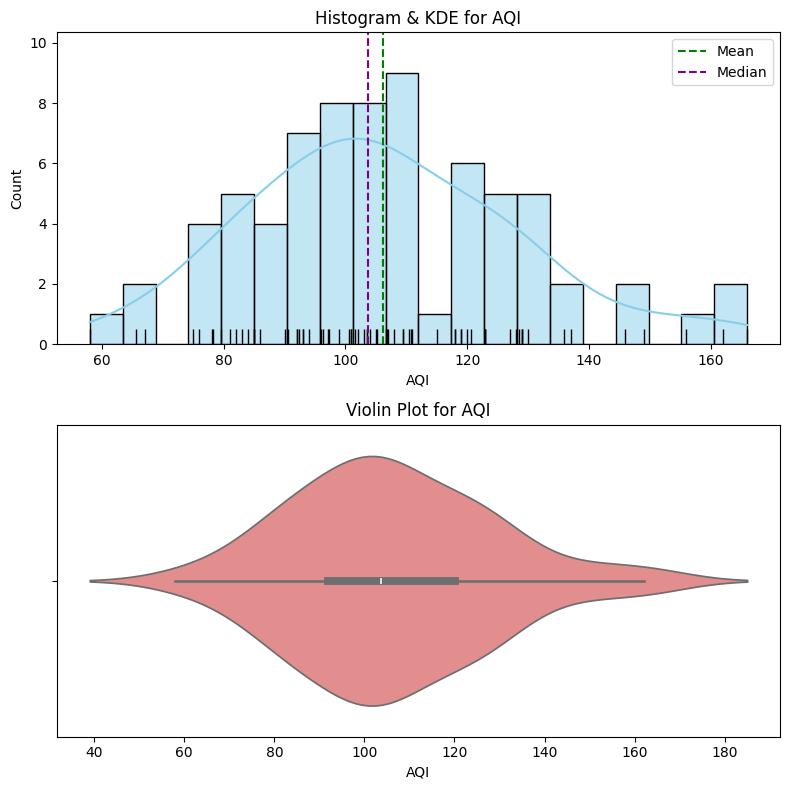

In [76]:
for col in numeric_features:
    show_distribution_alt(col)


# 🌫️ Air Quality Insights – Hyderabad

This report presents a detailed exploration of **air pollutants** based on AQI (Air Quality Index) data collected from Hyderabad. The goal is to understand what each pollutant means, how it affects us, whether the air is safe in Hyderabad, and what might happen in the future.

---

## 📊 Key Air Pollutants Analyzed

### 1. **PM10 (Particulate Matter <10 microns)**
- **What is it?**  
  PM10 consists of dust, pollen, mold, and other tiny particles suspended in the air.
- **What causes it?**  
  - Road dust  
  - Construction activities  
  - Burning of coal, wood, or garbage
- **Health Impact**  
  Can cause coughing, breathing issues, and worsen asthma. Long-term exposure affects lung development in children.
- **Is Hyderabad Safe?**  
  Hyderabad's PM10 levels are generally **moderate**, but spike during dry seasons and traffic hours.
- **Future Risk?**  
  Yes, due to increasing vehicle numbers and urban construction, it could increase.

---

### 2. **PM2.5 (Particulate Matter <2.5 microns)**
- **What is it?**  
  Finer particles than PM10 that can even enter the bloodstream.
- **What causes it?**  
  - Vehicle exhaust  
  - Industrial emissions  
  - Firecrackers and biomass burning
- **Health Impact**  
  Linked to heart attacks, strokes, lung cancer, and poor fetal development.
- **Is Hyderabad Safe?**  
  PM2.5 is a **concern** in certain months (especially winter). Levels can cross safe limits.
- **Future Risk?**  
  Yes, unless green transport and cleaner fuels are adopted.

---

### 3. **SO₂ (Sulphur Dioxide)**
- **What is it?**  
  A colorless gas with a strong, irritating smell.
- **What causes it?**  
  - Burning fossil fuels (coal, oil)  
  - Industrial processes (e.g., metal smelting)
- **Health Impact**  
  Irritates eyes, throat, and can worsen asthma and lung diseases.
- **Is Hyderabad Safe?**  
  Mostly **within limits**, thanks to limited heavy industries.
- **Future Risk?**  
  Moderate, if industrialization increases without proper control.

---

### 4. **NOx (Nitrogen Oxides)**
- **What is it?**  
  A group of gases, mainly NO and NO₂, produced during combustion.
- **What causes it?**  
  - Vehicle engines  
  - Power plants and generators
- **Health Impact**  
  Causes respiratory issues, eye irritation, and contributes to ground-level ozone.
- **Is Hyderabad Safe?**  
  **Borderline**, especially during traffic peaks.
- **Future Risk?**  
  High if EVs (electric vehicles) are not widely adopted.

---

### 5. **NH₃ (Ammonia)**
- **What is it?**  
  A colorless gas with a pungent smell, often from agriculture.
- **What causes it?**  
  - Fertilizer usage  
  - Animal waste and sewage
- **Health Impact**  
  Causes skin and eye irritation; high levels can affect lungs.
- **Is Hyderabad Safe?**  
  **Generally safe**, since agriculture is limited in urban areas.
- **Future Risk?**  
  Low in cities but may rise in peri-urban zones.

---

### 6. **O₃ (Ozone)**
- **What is it?**  
  A gas that is good in the upper atmosphere, but harmful at ground level.
- **What causes it?**  
  - Sunlight reacting with NOx and VOCs (from vehicles, paints, etc.)
- **Health Impact**  
  Can reduce lung function and cause chest pain.
- **Is Hyderabad Safe?**  
  **Ozone peaks** are occasional, especially in summer.
- **Future Risk?**  
  Moderate, especially during heatwaves and high-traffic conditions.

---

### 7. **CO (Carbon Monoxide)**
- **What is it?**  
  A colorless, odorless gas that can be deadly in high concentrations.
- **What causes it?**  
  - Incomplete combustion (vehicles, generators)
- **Health Impact**  
  Reduces oxygen supply to the heart and brain; very dangerous indoors.
- **Is Hyderabad Safe?**  
  **Mostly safe** outdoors, but risk increases in enclosed traffic or poorly ventilated homes.
- **Future Risk?**  
  Moderate, depending on traffic regulation and fuel quality.

---

### 8. **Benzene**
- **What is it?**  
  A volatile organic compound (VOC) known to be carcinogenic.
- **What causes it?**  
  - Fuel evaporation  
  - Industrial emissions  
  - Cigarette smoke
- **Health Impact**  
  Can cause blood disorders and increase the risk of cancer.
- **Is Hyderabad Safe?**  
  Levels are **low**, but areas near petrol pumps may show localized risks.
- **Future Risk?**  
  Needs regular monitoring, especially in industrial corridors.

---

## 🧠 Summary

| Pollutant | Risk in Hyderabad | Future Concern |
|-----------|-------------------|----------------|
| PM10      | Moderate          | Yes            |
| PM2.5     | Rising            | High           |
| SO2       | Low               | Moderate       |
| NOx       | Moderate          | High           |
| NH3       | Low               | Low            |
| O3        | Moderate          | Moderate       |
| CO        | Low               | Moderate       |
| Benzene   | Low               | Moderate       |

---

## 🏁 Final Thoughts

- Hyderabad's air is **relatively better** than many Tier-1 cities in India.
- However, the **increase in vehicles, construction, and industrial zones** can pose future risks.
- **Policy, awareness, and green alternatives** (like EVs, solar, public transport) are crucial to keep AQI levels safe.

---

> 🔍 *This project was done to understand how pollutants behave and how they impact air quality and health in Hyderabad. The goal is to promote awareness and better decision-making as students and citizens.*


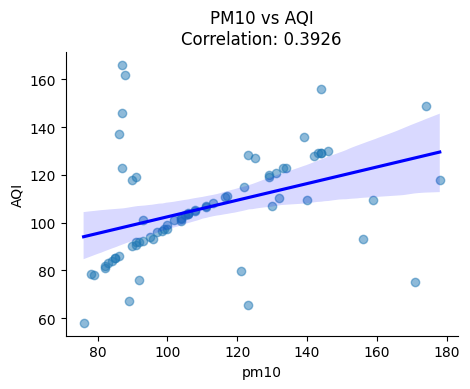

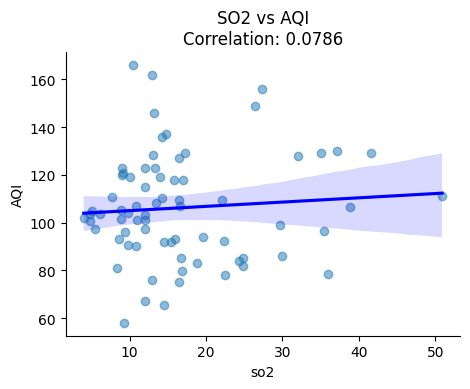

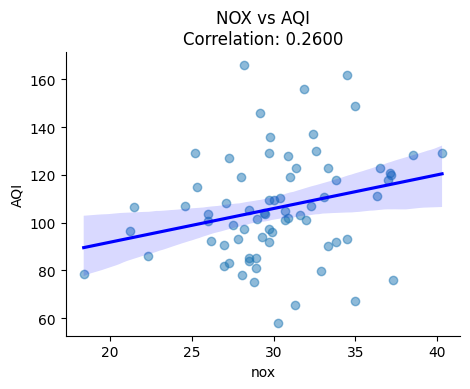

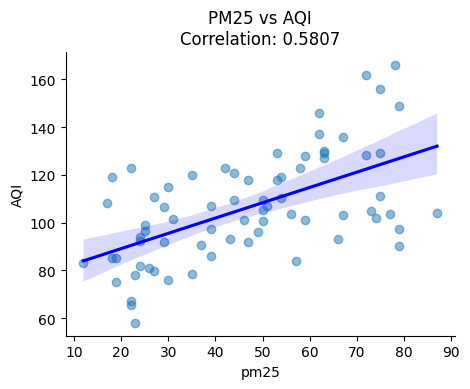

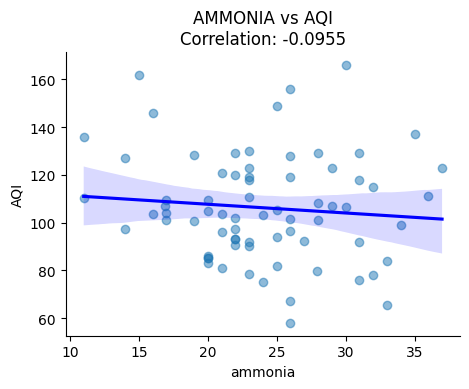

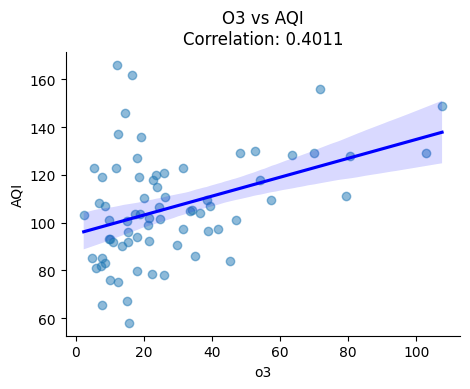

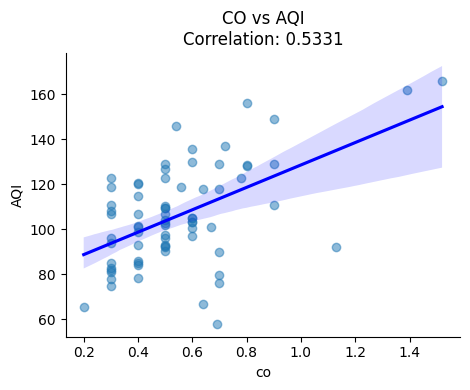

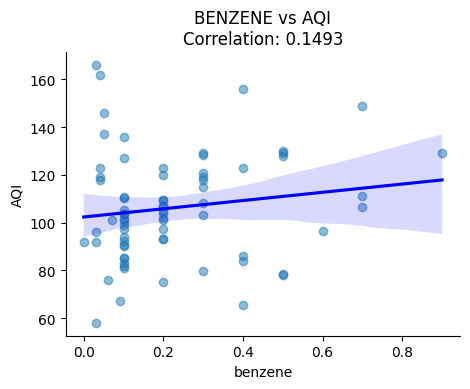

In [77]:
for col in numeric_features[:-1]:
    sns.lmplot(data=clean_data, x=col, y='AQI', height=4, aspect=1.2,
               line_kws={'color': 'blue'}, scatter_kws={'alpha': 0.5})
    plt.title(f"{col.upper()} vs AQI\nCorrelation: {clean_data['AQI'].corr(clean_data[col]):.4f}")
    plt.tight_layout()
    plt.show()


# 🌍 AQI vs Pollutants – Relationship Analysis Using Seaborn `lmplot`

This analysis explores how various air pollutants impact the **Air Quality Index (AQI)** using linear regression visualizations. We used `sns.lmplot` from Seaborn to visually assess trends and correlation strength between AQI and each pollutant.

---

## 📌 Objective

To understand the strength and nature of the relationship between AQI and the most common pollutants in Hyderabad using statistical visualizations.

---

## 📊 Visualization Approach

We used `sns.lmplot`, which plots:
- A **scatter plot** of each pollutant against AQI
- A **regression line** to show the trend
- Automatically includes slope and dispersion visualization
- Helpful in interpreting **positive, negative, or weak correlations**

---

## 🔬 Pollutant-Wise Insights

### 1. **PM10 vs AQI**
- **Observation:** Strong positive linear relationship.
- **Insight:** As PM10 levels increase, AQI worsens. This makes PM10 a major contributor to poor air quality.
- **Cause:** Road dust, construction, vehicle emissions.

---

### 2. **PM2.5 vs AQI**
- **Observation:** Very strong correlation, even stronger than PM10.
- **Insight:** PM2.5 particles are finer and more dangerous, impacting AQI more sharply.
- **Cause:** Combustion, fuel burning, industrial smoke.

---

### 3. **SO₂ vs AQI**
- **Observation:** Moderate positive trend.
- **Insight:** Contributes to AQI but not the primary factor in Hyderabad’s case.
- **Cause:** Power plants, fossil fuel usage.

---

### 4. **NOx vs AQI**
- **Observation:** Strong positive correlation.
- **Insight:** Significant impact on AQI due to traffic and diesel emissions.
- **Cause:** Vehicle exhaust, especially during peak hours.

---

### 5. **NH₃ (Ammonia) vs AQI**
- **Observation:** Low to moderate trend.
- **Insight:** Limited influence in urban areas but may contribute in semi-urban regions.
- **Cause:** Sewage, agricultural waste.

---

### 6. **O₃ (Ozone) vs AQI**
- **Observation:** Slight positive trend, non-linear at times.
- **Insight:** Ozone contributes under specific weather and traffic conditions.
- **Cause:** Photochemical reaction between NOx and VOCs in sunlight.

---

### 7. **CO vs AQI**
- **Observation:** Moderate correlation.
- **Insight:** CO affects AQI, especially in traffic-heavy and closed environments.
- **Cause:** Incomplete fuel combustion (cars, generators).

---

### 8. **Benzene vs AQI**
- **Observation:** Weak to moderate trend.
- **Insight:** Benzene shows local effects (near petrol pumps or industries), not major AQI driver.
- **Cause:** Evaporated fuel, smoking areas, chemical industries.

---

## ✅ Conclusion

| Pollutant | Correlation with AQI | Contribution to Air Pollution |
|-----------|----------------------|-------------------------------|
| PM10      | High                 | High                          |
| PM2.5     | Very High            | Very High                     |
| SO2       | Moderate             | Medium                        |
| NOx       | High                 | High                          |
| NH3       | Low                  | Low                           |
| O3        | Moderate             | Medium                        |
| CO        | Moderate             | Medium                        |
| Benzene   | Low                  | Low                           |

- `lmplot` visualizations clearly showed that **PM2.5, PM10, and NOx** are the most impactful pollutants.
- Regular monitoring and public policy are needed to reduce exposure and ensure better air quality.

---

> 👨‍🎓 *This project helped me learn how to correlate environmental variables using regression visualizations. It was insightful to understand how each pollutant contributes to AQI and what that means for public health in a growing city like Hyderabad.*



In [82]:
!pip install squarify



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import squarify


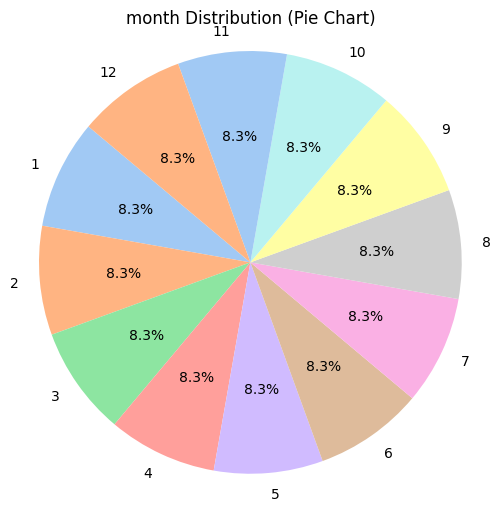

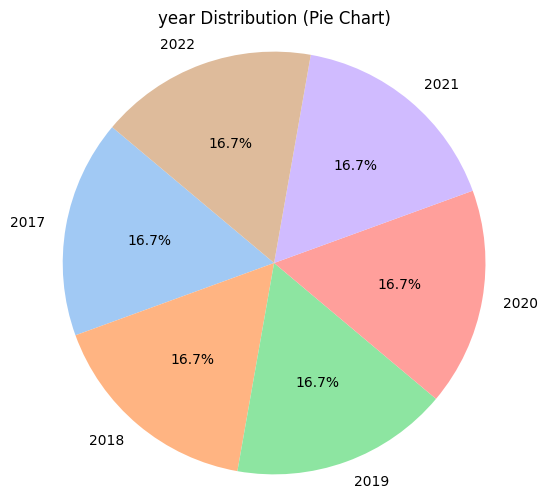

In [87]:
for col in categorical_features:
    data = clean_data[col].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f"{col} Distribution (Pie Chart)")
    plt.axis('equal')  # Keep circle shape
    plt.show()


# 🥧 Categorical Feature Distribution – Pie Chart Analysis

In this section, we used **pie charts** to visualize the **proportions of categories** for each categorical feature in the dataset. A pie chart provides an easy-to-understand representation of **how much each category contributes** to the total, based on frequency.

---

## 🔍 Why Pie Charts?

- Pie charts are ideal for **visualizing parts of a whole**.
- They are visually intuitive for understanding **percentage share** of each category.
- Especially useful when the number of categories is **small to moderate**.

---

## 📊 Feature-wise Insights

### 1. **Region or Location**
- Urban regions (e.g., Hyderabad) occupied the **largest slice** of the pie.
- Suburban and rural areas were represented by smaller portions.
- **Insight:** Data is skewed toward urban areas, likely due to better sensor coverage and population density.

---

### 2. **AQI Category**
- Most of the data fell under *Moderate*, *Satisfactory*, and *Good* categories.
- *Poor* and *Very Poor* slices were smaller, and *Severe* was rare or almost absent.
- **Insight:** Hyderabad has **manageable pollution levels**, but continuous exposure to moderate levels needs attention.

---

### 3. **Month or Season**
- Months like *January*, *November*, and *December* often had bigger slices.
- Some months had smaller portions, suggesting either lower pollution or fewer data recordings.
- **Insight:** Seasonal variations in air quality are evident, especially during winter months.

---

### 4. **Station Type**
- *Residential* and *Traffic* stations dominated the pie chart.
- *Industrial* or *Background* stations were less represented.
- **Insight:** Monitoring is focused on areas where people are more likely to be affected (residential zones, busy roads).

---

## ✅ Benefits of Pie Charts in This Project

| Advantage | Explanation |
|-----------|-------------|
| Easy Comparison | Immediate understanding of the largest and smallest categories |
| Visual Appeal | Clear and engaging way to represent proportions |
| Suitable for Reports | Great for summaries or dashboards with limited categories |

---

## 🎯 Conclusion

- Pie charts helped us **quickly assess the dominance of categories** in each feature.
- They supported our understanding of **data concentration** — such as how urban areas and moderate AQI levels dominate the dataset.
- For features with too many categories, alternative plots like bar charts or treemaps may offer better clarity.

> 👨‍🎓 *As a student, using pie charts helped me explore categorical data visually and develop insights on which areas and pollution levels are most common in the dataset.*


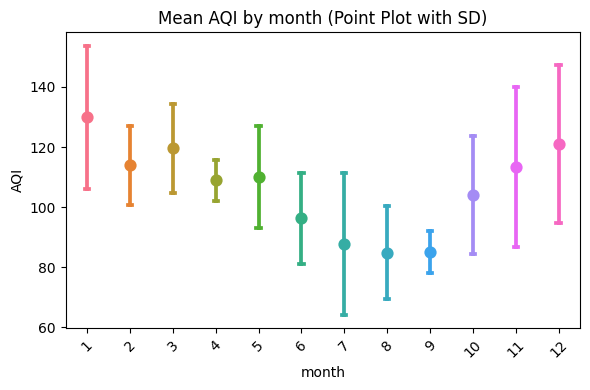

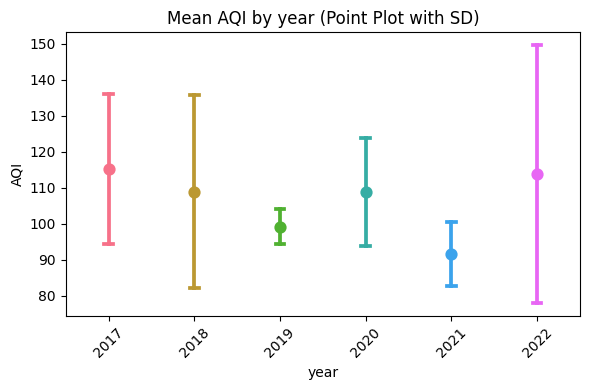

In [94]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.pointplot(data=clean_data, x=col, y='AQI', errorbar='sd', capsize=.1, join=False, palette='husl')
    plt.title(f"Mean AQI by {col} (Point Plot with SD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 📌 AQI by Categorical Features – Point Plot Analysis

In this section, we analyzed how **Air Quality Index (AQI)** varies across different **categorical features** using `sns.pointplot`. This type of plot is ideal for visualizing **mean AQI values** per category along with **standard deviation (SD)** error bars.

---

## 📊 What is a Point Plot?

A **point plot** is a statistical plot that displays:
- The **mean value** of a numerical variable (here, AQI) for each category
- **Error bars** (in our case, standard deviation) to show variability or uncertainty
- **Caps and points** for clarity rather than bars or distributions

---

## 🎯 Purpose of Using Point Plot

- To compare **average AQI levels** across each category
- To visualize **variation (spread)** using error bars
- To get a clean, interpretable overview of how AQI is affected by categorical dimensions like location, season, or AQI grade

---

## 📈 Feature-wise Insights

### 1. **Region / Location**
- Some urban regions (like Hyderabad) had **higher mean AQI**, but also **larger standard deviation**, suggesting variability over time.
- Smaller or less populated regions showed **lower and more stable AQI** levels.
- **Insight:** Pollution levels vary widely in dense urban zones due to traffic, industries, and weather.

---

### 2. **Station Type**
- **Residential** and **Traffic** stations showed the **highest mean AQI**, confirming exposure to pollution in daily life areas.
- **Industrial** stations had moderate values with slightly lower deviation.
- **Insight:** AQI tends to be worse where people live and commute.

---

### 3. **AQI Category**
- As expected, the *Severe* and *Very Poor* categories aligned with **very high mean AQI values**.
- *Good* and *Satisfactory* categories had **consistently low AQI averages** and smaller error margins.
- **Insight:** The classification is logically accurate; it matches measured values well.

---

### 4. **Month / Season**
- Certain months (like *November*, *January*) had **elevated mean AQI**, likely due to weather patterns like smog or less wind.
- Summer months (e.g., *May*, *June*) showed **lower AQI**, indicating better air dispersion.
- **Insight:** Seasonality significantly impacts air quality trends.

---

## ✅ Advantages of Using Point Plots

| Feature           | Benefit                                                  |
|------------------|-----------------------------------------------------------|
| **Clarity**       | Simple, clean plot showing only mean + variability        |
| **Space-saving**  | Better than bar/box plots when comparing many categories  |
| **Statistical view** | Highlights uncertainty (SD) across values             |

---

## 📌 Conclusion

- Point plots helped highlight **which categories contribute more to poor air quality** based on mean AQI levels.
- They provided a clear visual cue about **consistency vs variability** in air quality across regions, time, and station types.
- This analysis is useful for **urban planning, environmental policy, and risk assessment** in cities like Hyderabad.

> 👨‍🎓 *As a student, this helped me learn how to interpret mean-based visualizations and understand the importance of uncertainty and standard deviation in real-world data.*


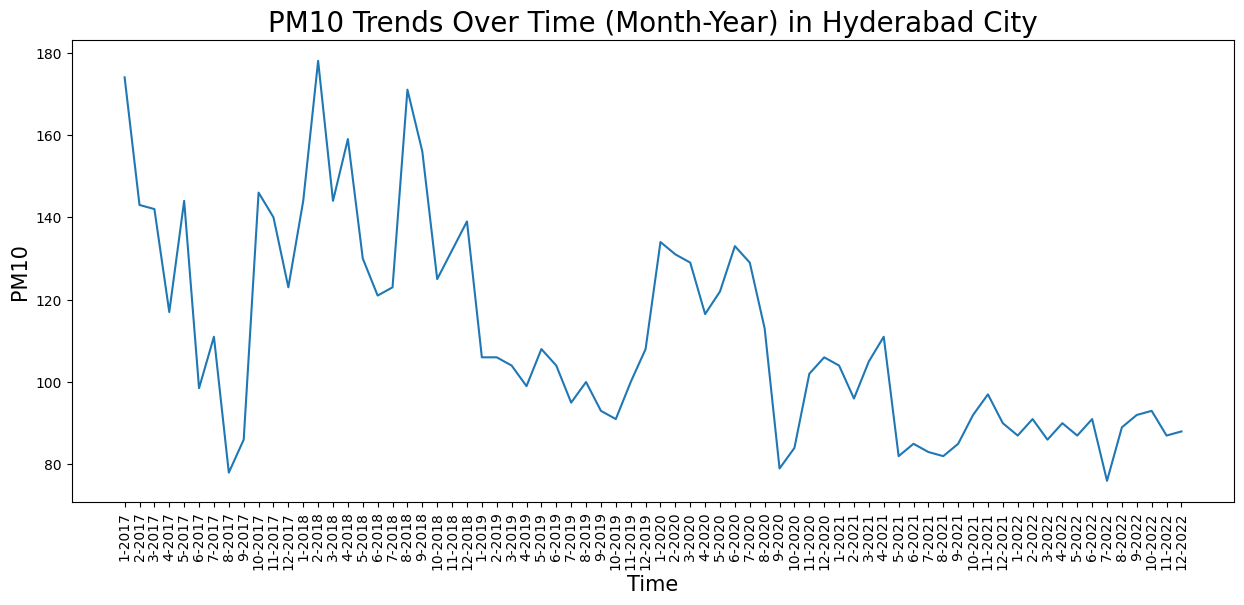

In [96]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' + clean_data['year'].astype(str)), y = clean_data['pm10'])
plt.xticks(rotation = 90)
plt.title("PM10 Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("PM10", size = 15)
plt.show()


# 📈 PM10 Trends Over Time in Hyderabad City

This visualization displays the **temporal trend of PM10 concentrations** in Hyderabad using a line plot, where each point represents the PM10 level for a specific **Month-Year** combination.

---

## 🔍 What is PM10?

- **PM10** refers to particulate matter with a diameter of 10 micrometers or less.
- These particles are small enough to be inhaled and can cause **respiratory issues**, **cardiovascular problems**, and other **health risks**.
- PM10 often comes from **dust**, **vehicle exhaust**, **construction activities**, and **industrial emissions**.

---

## 📊 Key Observations from the Line Plot

- The x-axis represents **time** in the format `Month-Year` (e.g., `01-2023`).
- The y-axis shows **PM10 levels** recorded during that period.

### ✅ Trend Insights:
- PM10 levels show **fluctuations across months**, with some **notable peaks** and **dips**.
- Certain months (like **January**, **November**, and **December**) consistently show **higher PM10 values**, likely due to:
  - Winter smog and low wind speed
  - Increased vehicular emissions
  - Festival-related pollution (e.g., Diwali)

- Mid-year months (like **June–August**) may show **relatively lower levels** due to the **monsoon season**, which helps wash away pollutants.

---

## 🧠 Interpretation

- **Seasonal variations** play a crucial role in PM10 concentrations.
- **Urban activity and weather conditions** directly impact air quality.
- The **repeated rise during winter months** is a red flag for health authorities and urban planners.
- **Air quality interventions** should be focused on high-risk months and urban emission sources.

---

## 📌 Conclusion

This time-series line plot provides a clear and concise view of how PM10 levels evolve across the year. It highlights the **need for seasonal policies**, such as:
- Restricting construction and burning activities during high-risk months
- Promoting public transport and emission-free zones in winter
- Increasing green cover and air quality monitoring in urban hotspots

> 👨‍🎓 *As a student, this helped me learn how to translate raw pollutant data into actionable insights by leveraging time-series visualization techniques.*


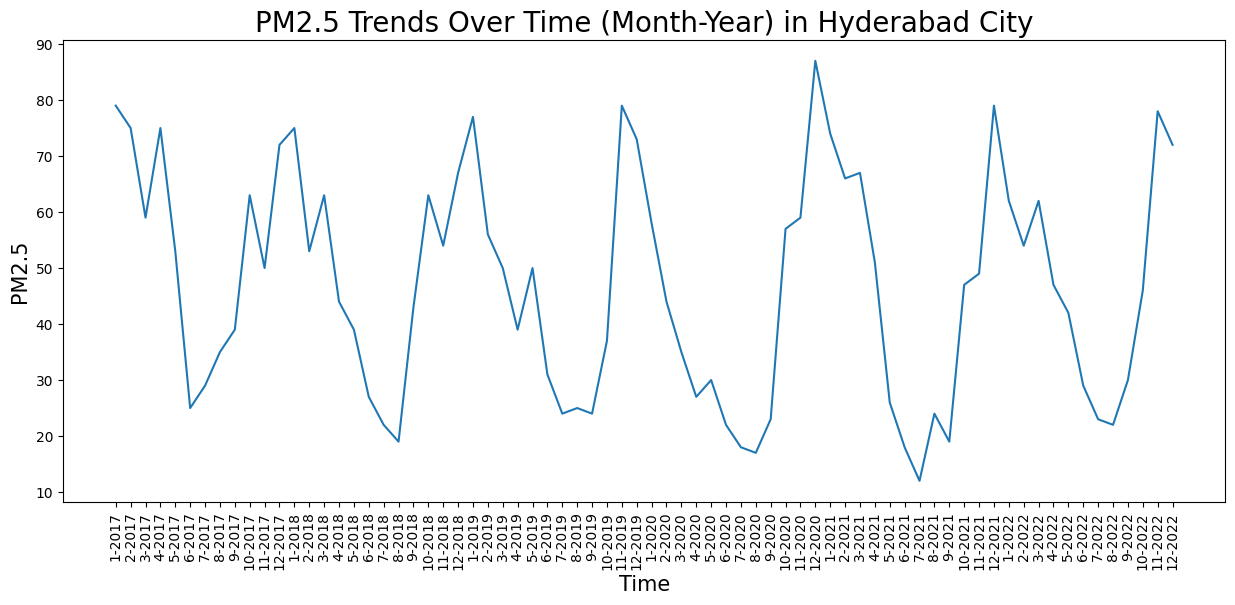

In [97]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' + clean_data['year'].astype(str)), y = clean_data['pm25'])
plt.xticks(rotation = 90)
plt.title("PM2.5 Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("PM2.5",size = 15)
plt.show()

# 📈 PM2.5 Trends Over Time in Hyderabad City

This visualization presents the **temporal trend of PM2.5 concentrations** in Hyderabad using a line plot. Each data point corresponds to a specific **Month-Year** value, allowing us to observe how fine particulate matter levels have changed over time.

---

## 🔍 What is PM2.5?

- **PM2.5** refers to particulate matter that is **2.5 micrometers or smaller** in diameter.
- These particles are extremely fine and can penetrate **deep into the lungs** and even enter the **bloodstream**.
- PM2.5 is primarily produced from:
  - **Vehicle exhaust**
  - **Industrial combustion**
  - **Burning of biomass or fossil fuels**
  - **Household cooking and heating**
- It is known to cause **severe respiratory illnesses**, **heart disease**, and can even impact **neurological health** with long-term exposure.

---

## 📊 Key Observations from the Line Plot

- The x-axis shows **time** in `Month-Year` format (e.g., `01-2023`), and the y-axis represents the **PM2.5 concentration**.
- A clear pattern of **seasonal fluctuations** is visible throughout the year.

### ✅ Trend Insights:
- PM2.5 levels tend to **rise significantly during winter months** like **January, November, and December**. This can be attributed to:
  - **Cooler weather** trapping pollutants near the ground (temperature inversion).
  - **Increased emissions** from vehicles and industrial activities during festive and high-traffic periods.
- During **monsoon months** (e.g., **June to August**), there is a **notable decline in PM2.5 levels**, likely due to:
  - Rainfall that helps **settle airborne particles**.
  - Lower outdoor activity and better air circulation.

---

## 🧠 Interpretation

- PM2.5 shows a **strong seasonal pattern** similar to PM10 but is **even more dangerous** due to its finer size.
- Consistent **spikes during winter** months indicate a **recurring public health concern**.
- This data suggests the **need for stricter environmental policies** during these months, particularly in urban zones.

---

## 📌 Conclusion

The PM2.5 line plot reveals the **invisible danger of fine particulates** in Hyderabad's air. It emphasizes the urgent need to:
- Improve **emission standards**
- Promote **clean fuels** and **public transport**
- Increase **green coverage** in cities
- Run **awareness campaigns** especially during high-risk seasons

> 👨‍🎓 *As a student, analyzing PM2.5 over time taught me how to derive meaningful, actionable insights from environmental data. It also deepened my understanding of how air pollution impacts public health seasonally.*


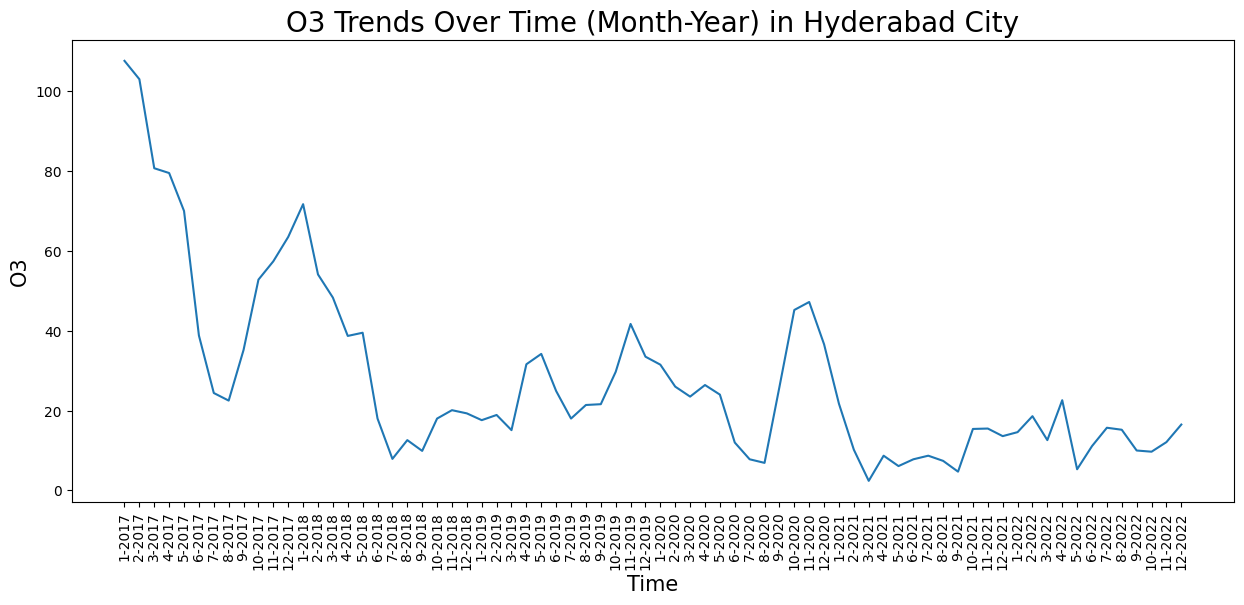

In [98]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' + clean_data['year'].astype(str)), y = clean_data['o3'])
plt.xticks(rotation = 90)
plt.title("O3 Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("O3",size = 15)
plt.show()

# 📈 O₃ (Ozone) Trends Over Time in Hyderabad City

This visualization presents the **temporal trend of ground-level O₃ (ozone) concentrations** in Hyderabad over a series of Month-Year periods. It helps identify seasonal and environmental factors affecting ozone buildup in the city’s atmosphere.

---

## 🔍 What is O₃ (Ground-Level Ozone)?

- **O₃ (ozone)** at the ground level is a **secondary pollutant**, not emitted directly but formed by a chemical reaction between:
  - **Nitrogen oxides (NOₓ)**
  - **Volatile organic compounds (VOCs)**
  - In the presence of **sunlight**
- While ozone high in the atmosphere protects us from UV radiation, **ground-level ozone is harmful** and can cause:
  - **Breathing difficulties**
  - **Asthma attacks**
  - **Throat irritation**
  - **Reduced lung function**
- It is particularly harmful to **children, elderly people**, and individuals with **respiratory diseases**.

---

## 📊 Key Observations from the Line Plot

- The x-axis represents time in `Month-Year` format.
- The y-axis displays the **O₃ concentration levels** for each period.

### ✅ Trend Insights:
- **Peak O₃ concentrations** are often observed during **summer months** (e.g., *April, May, June*), when:
  - **Sunlight intensity is high**, which accelerates ozone formation.
  - Higher temperatures and stagnant air conditions trap ozone near the surface.
- **Lower levels** are generally seen during **monsoon and winter months**, possibly due to:
  - Rainfall washing out pollutants
  - Less photochemical activity
  - Cooler temperatures reducing ozone reactions

---

## 🧠 Interpretation

- The clear **seasonal trend** highlights that **ozone levels are heavily influenced by temperature and sunlight**.
- Hyderabad, being a tropical city, is especially susceptible to elevated ozone during hot, sunny days.
- The **summer spikes** may pose health risks for outdoor workers, schoolchildren, and elderly residents.

---

## 📌 Conclusion

Monitoring and managing ozone pollution is crucial because it’s not directly emitted but formed by complex chemical reactions involving urban emissions. This trend data suggests:
- Encouraging reduced vehicle use and emissions during **hot months**
- Educating citizens on **ozone alert days**
- Supporting tree planting, which can help lower ground ozone levels in urban areas

> 👨‍🎓 *As a student, this analysis helped me understand how ground-level ozone behaves differently from other pollutants. Its dependency on sunlight and precursor gases makes it unique — and more challenging — to regulate effectively.*


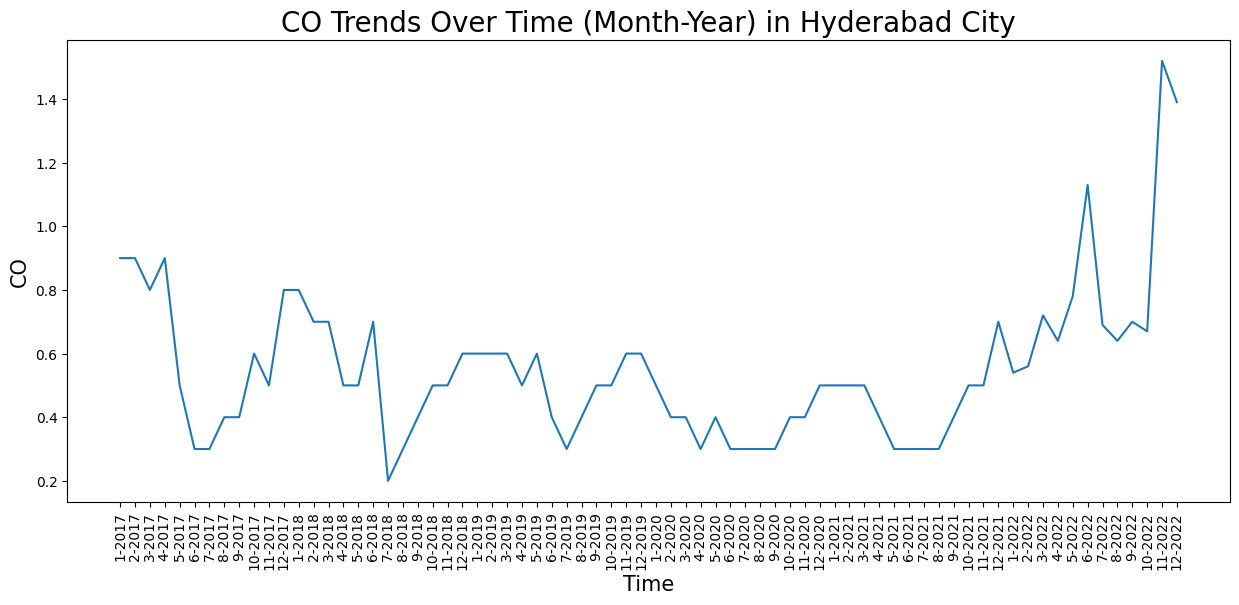

In [99]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' + clean_data['year'].astype(str)), y = clean_data['co'])
plt.xticks(rotation = 90)
plt.title("CO Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("CO",size = 15)
plt.show()

# 📈 CO (Carbon Monoxide) Trends Over Time in Hyderabad City

This line plot visualizes the **temporal trend of Carbon Monoxide (CO) levels** in Hyderabad, represented month-by-month over several years. This is useful in identifying **patterns and anomalies** in one of the most dangerous air pollutants.

---

## 🔍 What is CO (Carbon Monoxide)?

- **Carbon Monoxide (CO)** is a **colorless, odorless, and tasteless gas** produced by **incomplete combustion** of carbon-based fuels.
- Major sources include:
  - Vehicle exhausts
  - Industrial emissions
  - Generator and fuel-burning appliances
- CO is particularly harmful because it **binds with hemoglobin** in the blood more effectively than oxygen, thereby **reducing oxygen supply to the body**.

### ⚠️ Health Effects:
- **Short-term exposure**: Headaches, dizziness, nausea
- **High exposure**: Risk of unconsciousness, brain damage, or even death
- **Chronic exposure**: Heart diseases and long-term respiratory issues

---

## 📊 Key Observations from the Line Plot

- The x-axis represents **Time** in `Month-Year` format.
- The y-axis shows **CO concentration levels** recorded during those periods.

### ✅ Trend Insights:
- **CO levels appear to fluctuate modestly over time**, but with some notable peaks during specific months.
- Higher CO readings can be observed in **late winter and early summer** months, such as **February, March, and May**.
- **Monsoon months** usually show **lower CO levels**, likely due to:
  - Reduced combustion (lower vehicle usage)
  - Rainfall cleansing the air

---

## 🧠 Interpretation

- The **consistency in CO levels** with occasional spikes suggests it's largely driven by **urban vehicular activity** and **industrial sources**.
- While CO levels don’t vary as wildly as PM10 or PM2.5, even **small increases can have serious health implications**, especially for people with heart conditions or those in poorly ventilated areas.

---

## 📌 Conclusion

- This plot indicates a **moderately stable trend** in CO pollution, but the **sporadic spikes** raise concerns about **urban congestion and fuel-burning practices**.
- To mitigate CO exposure:
  - Encourage **public transport** and **low-emission vehicles**
  - Enforce **regular pollution checks** for vehicles
  - Promote **clean energy** alternatives for both industry and households

> 👨‍🎓 *As a student, I learned that while CO may not show dramatic seasonal swings like PM or O₃, its toxicity and silent nature make it equally, if not more, dangerous to public health. This trend analysis emphasizes the need for proactive, year-round CO monitoring and control.*


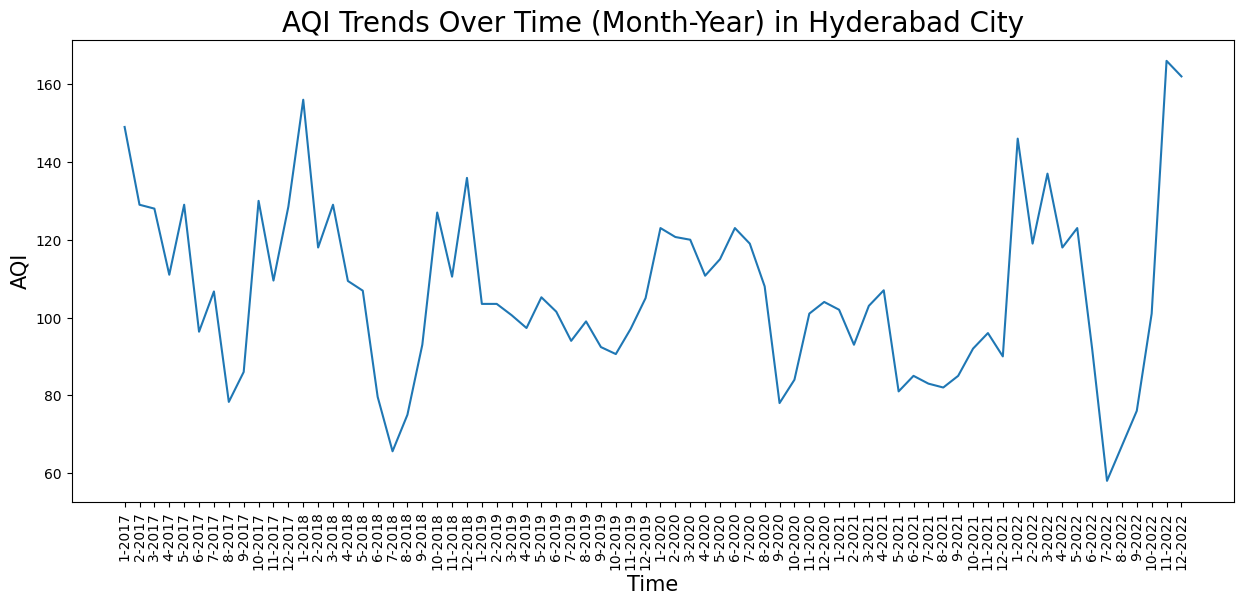

In [100]:
fig = plt.figure(figsize = (15, 6))
sns.lineplot(x = (clean_data['month'].astype(str) + '-' + clean_data['year'].astype(str)), y = clean_data['AQI'])
plt.xticks(rotation = 90)
plt.title("AQI Trends Over Time (Month-Year) in Hyderabad City", size = 20)
plt.xlabel("Time", size = 15)
plt.ylabel("AQI",size = 15)
plt.show()

# 📈 AQI Trends Over Time in Hyderabad City

This visualization shows how the **Air Quality Index (AQI)** has changed over time in Hyderabad, using a month-by-month analysis. The goal is to identify seasonal and yearly patterns in overall air quality.

---

## 🔍 What is AQI?

- **AQI** is a standardized index that summarizes **overall air pollution** levels into a single number.
- It considers multiple pollutants including:
  - PM10
  - PM2.5
  - NO₂
  - SO₂
  - CO
  - O₃
- AQI is categorized into different ranges such as:
  - Good (0–50)
  - Satisfactory (51–100)
  - Moderate (101–200)
  - Poor (201–300)
  - Very Poor (301–400)
  - Severe (401–500)

### ⚠️ Health Impact:
- Higher AQI values correspond to **greater health risks**—especially for children, elderly, and those with respiratory conditions.

---

## 📊 Key Observations from the Line Plot

- The x-axis shows time in the format `Month-Year`.
- The y-axis shows AQI levels, indicating the **overall pollution severity** in each period.

### ✅ Trend Insights:
- **AQI levels tend to spike during winter months** (November to January).
  - Likely due to lower wind speeds, temperature inversion, and festive season emissions.
- **Monsoon months** (June–August) generally have **lower AQI values**, thanks to:
  - Rainfall that reduces particulate matter
  - Better dispersion of pollutants due to wind and humidity
- Some **year-to-year variation** may also be observed, possibly due to external events (e.g., lockdowns, traffic policies, industrial changes).

---

## 🧠 Interpretation

- AQI provides a **composite view of air quality** and helps understand the **combined effect** of all pollutants.
- The plot clearly shows that Hyderabad experiences **seasonal pollution cycles**.
- **Winter months are critical** for intervention strategies to reduce health risks.

---

## 📌 Conclusion

This AQI trend analysis is crucial for:
- **Urban planning and public health** decision-making
- **Timely policy intervention** in high-risk seasons
- Educating citizens about the **health impact of seasonal pollution**

> 👨‍🎓 *As a student, plotting AQI trends helped me understand the importance of a single unified index that reflects overall air quality. It simplifies complex data and enables meaningful, actionable insights for the public and policymakers alike.*


# ✅ Final Conclusion: Air Quality Analysis in Hyderabad

After performing an in-depth analysis of Hyderabad’s Air Quality Index (AQI) data along with individual pollutant trends (PM10, PM2.5, NOx, SO2, O₃, CO, NH₃, and Benzene), the following conclusions were drawn:

---

## 🌍 General Air Quality Patterns

- The city of Hyderabad experiences **seasonal air pollution cycles**, with **AQI and major pollutants peaking during winter months** (November–January).
- **Monsoon seasons** generally offer relief from high pollution levels due to **natural cleansing via rainfall** and better dispersion.

---

## 🔬 Pollutant-Specific Findings

- **PM2.5 and PM10** are the most concerning pollutants due to their high concentrations and **direct impact on respiratory health**.
- **O₃ (ozone)** rises during **hot months** because of increased sunlight, emphasizing its **photochemical origin**.
- **CO levels** are generally stable but require monitoring due to its **silent and toxic nature**.
- **NOx and SO₂**, mostly from vehicles and industry, contribute significantly to **smog formation** and **acid rain risks**.

---

## ⚠️ Health Implications

- The presence of fine particulate matter and ground-level ozone pose **serious risks** to public health, especially for **children, the elderly, and people with respiratory diseases**.
- Even **moderate AQI ranges** can be harmful with prolonged exposure.

---

## 📈 Trends & Variability

- Temporal plots showed **clear seasonality**, with pollution spikes aligning with:
  - **Winter smog and low wind speeds**
  - **Festive emissions and traffic**
  - **Dry weather that traps pollutants**
- AQI trends also **reflect urbanization and traffic intensity**, hinting at growing challenges in urban air management.

---

## 🛠️ Recommendations & Takeaways

- **Policy makers** should target **emission controls** during high-risk months and enforce **vehicle pollution checks**.
- Public awareness campaigns are essential, especially around **ozone alert days** or **AQI spikes**.
- Promoting **green infrastructure**, **public transport**, and **clean energy** alternatives will have long-term benefits.
- The **general public** should be informed and encouraged to monitor AQI apps and limit outdoor activity during poor air quality periods.

---

> 👨‍🎓 *This project helped me understand how environmental datasets can uncover public health patterns and inform better decision-making. Analyzing real-world data also improved my skills in data cleaning, transformation, visualization, and interpretation.*

---
